In [1]:
"""
    处理文件，读入，配对并保存到一个数据集

"""
# 在当前目录下定义的数据集文件夹
dataDir = "Proteinfasta"
# 在当前目录下定义的模型集文件夹
modelDir= "Models"
# CNN的训练参数组
cnnHyperParamsSets=[]
# 数据集定义，一共有5个数据集
DataPairs=[
    ["CF_TR_Sequence.fasta.csv","CF_TE_Sequence.fasta.csv"],
    ["CRYS_TR_Sequence.fasta.csv","CRYS_TE_Sequence.fasta.csv"],
    ["MC_TR_Sequence.fasta.csv","MC_TE_Sequence.fasta.csv"],
    ["MF_TR_Sequence.fasta.csv","MF_TE_Sequence.fasta.csv"],
    ["PF_TR_Sequence.fasta.csv","PF_TE_Sequence.fasta.csv"]
]
"""
    其他的随便写点什么

"""
# 获取指定目录下的文件名称，对文件名称进行配对提取，等待处理
import os
import re
import pandas as pd

def GetPair(ls:list,sux):
    out=[]
    for l in ls:
        if re.match(sux,l):
            na=l[:l.find("_Sequence.fasta")] #Look at the define of suffix
            pat=na+r'.*'+r'abel'
            for l2 in ls:
                if re.match(pat,l2):
                    il=[l,l2]
                    if il not in out:
                        out.append(il)
    return out
# 将每个pair合成，分别写成对应的Train与Test文件
def WritePair2(p):
    dfp=pd.read_csv(dataDir+"/"+p[0],header=None)
    dfl=pd.read_csv(dataDir+"/"+p[1],header=None)
    content=dfp[dfp.index%2!=0]
    content.reset_index(inplace=True,drop=True)
    name1=dfp[dfp.index%2==0]
    name1.reset_index(inplace=True,drop=True)
    dfp=pd.concat([name1,content],axis=1,ignore_index=True)
    dfp.columns=["Name","Text"]
    y=dfl[dfl.index%2!=0]
    y.reset_index(inplace=True,drop=True)
    dflName=dfl[dfl.index%2==0]
    dflName.reset_index(inplace=True,drop=True)
    dfl=pd.concat([dflName,y],axis=1,ignore_index=True)
    dfl.columns=["Name","y"]
    dfl=dfl.merge(dfp,on="Name",how="inner")
    dfl["y"]=dfl["y"].astype("int32")
    dfl["y"]=dfl["y"].apply(lambda x: 1 if x>0 else 0)
    dfl.to_csv(dataDir+"/"+str(p[0])+".csv",index=False)
    print("Write File: {0} and Length is {1} ".format(p[0],len(dfl)))
# 数据探索函数
def Load_Exploring(pair,pos,length:int=1000):
    df=pd.read_csv(dataDir+"/"+pair[pos])
    df["Length"]=df["Text"].apply(len)
    print("Data set is %s " % pair[pos])
    print("Max length of Text on this data set: "+ str(df["Length"].max()))
    print("Labels are: "+ str(df["y"].unique()))
    df["Length"].plot(kind="hist",bins=50,title=pair[pos]+" Length distribution")
    # for d in df.groupby(["y"]):
    #     d[1].plot(kind="hist",bins=100,title=str(d[0])+ " Length distribution")
    #     print(str(d[0])+" shape is "+ str(d[1].shape))
    print("{0}  of the proteins have a Length less than {1}".format(round(((df[df["Length"]<length].shape[0]/df.shape[0])*100),2),length))

In [2]:
# Write Data here
#### 如果已经有csv数据，就不要再运行这里了
files = os.listdir(dataDir)
suffix=r'.*\.fasta' 
pairs=GetPair(files,suffix)
print("---------------------Pairs of all data--------------------")
print(pairs)
print("---------------------Writing Pairs to csv--------------------")
# for p in pairs:
#     WritePair2(p)

---------------------Pairs of all data--------------------
[['CF_TE_Sequence.fasta', 'CF_TE_Label'], ['CF_TE_Sequence.fasta.csv', 'CF_TE_Label'], ['CF_TR_Sequence.fasta', 'CF_TR_Label'], ['CF_TR_Sequence.fasta.csv', 'CF_TR_Label'], ['CRYS_TE_Sequence.fasta', 'CRYS_TE_label'], ['CRYS_TE_Sequence.fasta.csv', 'CRYS_TE_label'], ['CRYS_TR_Sequence.fasta', 'CRYS_TR_Label'], ['CRYS_TR_Sequence.fasta.csv', 'CRYS_TR_Label'], ['MC_TE_Sequence.fasta', 'MC_TE_Label'], ['MC_TE_Sequence.fasta.csv', 'MC_TE_Label'], ['MC_TR_Sequence.fasta', 'MC_TR_Label'], ['MC_TR_Sequence.fasta.csv', 'MC_TR_Label'], ['MF_TE_Sequence.fasta', 'MF_TE_Label'], ['MF_TE_Sequence.fasta.csv', 'MF_TE_Label'], ['MF_TR_Sequence.fasta', 'MF_TR_Label'], ['MF_TR_Sequence.fasta.csv', 'MF_TR_Label'], ['PF_TE_Sequence.fasta', 'PF_TE_Label'], ['PF_TE_Sequence.fasta.csv', 'PF_TE_Label'], ['PF_TR_Sequence.fasta', 'PF_TR_Label'], ['PF_TR_Sequence.fasta.csv', 'PF_TR_Label']]
---------------------Writing Pairs to csv--------------------


Data set is CF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 8026
Labels are: [0 1]
99.08  of the proteins have a Length less than 1000
Data set is CRYS_TR_Sequence.fasta.csv 
Max length of Text on this data set: 10827
Labels are: [0 1]
96.57  of the proteins have a Length less than 1000
Data set is MC_TR_Sequence.fasta.csv 
Max length of Text on this data set: 5037
Labels are: [1 0]
98.82  of the proteins have a Length less than 1000
Data set is MF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 10827
Labels are: [0 1]
96.66  of the proteins have a Length less than 1000
Data set is PF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 9528
Labels are: [0 1]
98.68  of the proteins have a Length less than 1000


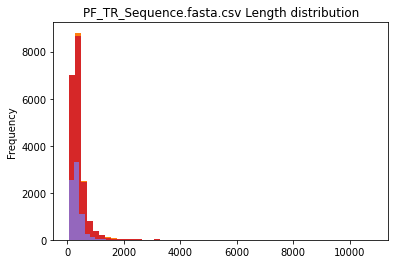

In [3]:
"""
这里进行数据探索

"""
for d in DataPairs:
    Load_Exploring(d,0,1000)

Data set is CF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 8026
Labels are: [0 1]
99.08  of the proteins have a Length less than 1000


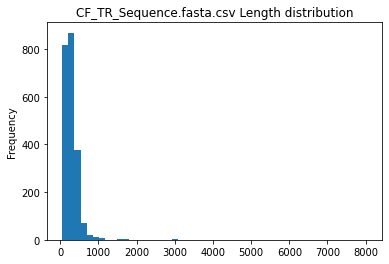

In [4]:
Load_Exploring(DataPairs[0],0,1000)

Data set is CRYS_TR_Sequence.fasta.csv 
Max length of Text on this data set: 10827
Labels are: [0 1]
96.57  of the proteins have a Length less than 1000


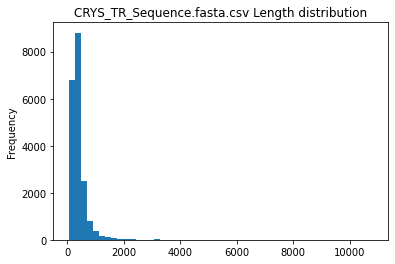

In [5]:
Load_Exploring(DataPairs[1],0,1000)

Data set is MC_TR_Sequence.fasta.csv 
Max length of Text on this data set: 5037
Labels are: [1 0]
98.82  of the proteins have a Length less than 1000


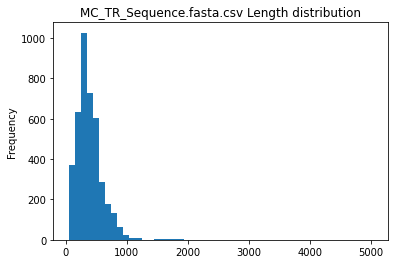

In [6]:
Load_Exploring(DataPairs[2],0,1000)

Data set is MF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 10827
Labels are: [0 1]
96.66  of the proteins have a Length less than 1000


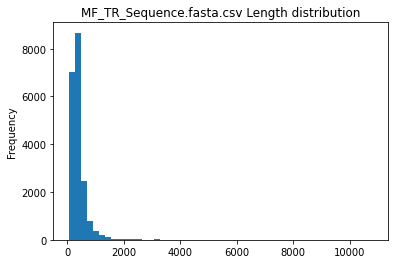

In [7]:
Load_Exploring(DataPairs[3],0,1000)

Data set is PF_TR_Sequence.fasta.csv 
Max length of Text on this data set: 9528
Labels are: [0 1]
98.68  of the proteins have a Length less than 1000


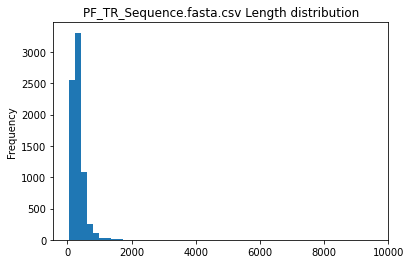

In [8]:
Load_Exploring(DataPairs[4],0,1000)

In [2]:
"""
这里模型训练

"""
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Embedding, Conv1D, Conv2D, MaxPooling1D, MaxPool2D, Reshape, Flatten, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

def Tokenize(dftr,dfte,sent_dim):
    word_dim = 50
    sentence_dim = sent_dim
    tokenizer = Tokenizer(num_words=word_dim)
    dftr["Text"]=dftr["Text"].apply(Chars2Seq)
    dfte["Text"]=dfte["Text"].apply(Chars2Seq)
    tokenizer.fit_on_texts(dftr["Text"])
    train_sequence = tokenizer.texts_to_sequences(dftr["Text"])
    test_sequence = tokenizer.texts_to_sequences(dfte["Text"])
    padded_train_sequences = pad_sequences(train_sequence, maxlen = sentence_dim)
    padded_test_sequences = pad_sequences(test_sequence, maxlen = sentence_dim)
    return padded_train_sequences, padded_test_sequences

def CNN2D(filter_sizes:list = [6, 12, 18],num_filters = 256):
    word_dim = 50
    sent_dim = 1024
    embedding_dim = 32
    drop = 0.3
    inputs = Input(shape=(sent_dim,), dtype='int32')
    embedding = Embedding(input_dim=word_dim, output_dim=embedding_dim,input_length=sent_dim)(inputs)
    reshape = Reshape((sent_dim, embedding_dim, 1))(embedding)
    conv2d_1 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    conv2d_2 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    conv2d_3 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    maxpool_1 = MaxPool2D(pool_size=(sent_dim - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv2d_1)
    maxpool_2 = MaxPool2D(pool_size=(sent_dim - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv2d_2)
    maxpool_3 = MaxPool2D(pool_size=(sent_dim - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv2d_3)
    concatenated_tensor = Concatenate(axis=1)([maxpool_1, maxpool_2, maxpool_3])
    flatten = Flatten()(concatenated_tensor)
    dropout = Dropout(drop)(flatten)
    output = Dense(units=2, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def Chars2Seq(chars):
    out=""
    for c in chars:
        out=out+c+" "
    return out

def CumstomeTrainOne(Dset,filter_sizes:list = [6, 12, 18],num_filters:int = 256):
    cnn_model_2d = CNN2D(filter_sizes,num_filters)
    batch_size = 32
    epochs = 2
    dftr=pd.read_csv(dataDir+"/"+Dset[0])
    dfte=pd.read_csv(dataDir+"/"+Dset[1])
    padded_train_sequences, padded_test_sequences = Tokenize(dftr,dfte,1024)
    history = cnn_model_2d.fit(x=padded_train_sequences, y=dftr["y"], validation_data=(padded_test_sequences, dfte["y"]), batch_size=batch_size, epochs=epochs, verbose=1)
    cnn_model_2d.save(modelDir+"/"+str(Dset[0])+"protein_cnn_model.model")
    print("%s trained on CNN" % str(Dset[0]))

In [ ]:
# Train the model on each data set respectively and store the trained model
for d in DataPairs:
    CumstomeTrainOne(d,[6, 12, 18],256)

Epoch 1/2
69/69 [==============================] - 7s 104ms/step - loss: 0.5987 - accuracy: 0.7239 - val_loss: 0.5769 - val_accuracy: 0.7381
Epoch 2/2
69/69 [==============================] - 6s 89ms/step - loss: 0.5895 - accuracy: 0.7239 - val_loss: 0.5755 - val_accuracy: 0.7381
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Models/CF_TR_Sequence.fasta.csvprotein_cnn_model.model\assets
CF_TR_Sequence.fasta.csv trained on CNN
Epoch 1/2
103/619 [===>..........................] - ETA: 43s - loss: 0.2483 - accuracy: 0.9372

In [14]:
# Train the model on the data for combined train data together
import math

def GatherTrainAll(datapairs):
    l=[]
    for d in datapairs:
        dftr=pd.read_csv(dataDir+"/"+d[0])
        l.append(dftr)
    df=pd.concat(l,axis=0)
    return df

def GetTr_Te(df,test_frac):
    df=df.sample(frac=1).reset_index(drop=True)
    num=len(df)
    test_num=math.floor(num*test_frac)
    return df[df.index>test_num], df[df.index<=test_num]

def CumstomeTrainALL(df,filter_sizes:list = [6, 12, 18],num_filters:int = 256):
    cnn_model_2d = CNN2D(filter_sizes,num_filters)
    batch_size = 32
    epochs = 10
    dftr,dfte= GetTr_Te(df,0.15)
    padded_train_sequences, padded_test_sequences = Tokenize(dftr,dfte,1024)
    history = cnn_model_2d.fit(x=padded_train_sequences, y=dftr["y"], validation_data=(padded_test_sequences, dfte["y"]), batch_size=batch_size, epochs=epochs, verbose=1)
    model_path=modelDir+"/"+"testAll"+"protein_cnn_model.model"
    cnn_model_2d.save(model_path)
    print("trained on CNN for testAll")

df=GatherTrainAll(DataPairs)
CumstomeTrainALL(df,[32, 64, 128],256)


Epoch 1/10
1415/1415 [==============================] - 326s 230ms/step - loss: 0.4825 - accuracy: 0.7934 - val_loss: 0.4579 - val_accuracy: 0.8013
Epoch 2/10
1415/1415 [==============================] - 322s 228ms/step - loss: 0.4196 - accuracy: 0.8316 - val_loss: 0.4330 - val_accuracy: 0.8437
Epoch 3/10
1415/1415 [==============================] - 325s 230ms/step - loss: 0.3592 - accuracy: 0.8563 - val_loss: 0.4538 - val_accuracy: 0.8524
Epoch 4/10
1415/1415 [==============================] - 318s 225ms/step - loss: 0.3262 - accuracy: 0.8692 - val_loss: 0.4452 - val_accuracy: 0.8490
Epoch 5/10
1415/1415 [==============================] - 318s 224ms/step - loss: 0.3070 - accuracy: 0.8720 - val_loss: 0.4640 - val_accuracy: 0.8196
Epoch 6/10
1415/1415 [==============================] - 316s 224ms/step - loss: 0.2991 - accuracy: 0.8770 - val_loss: 0.4510 - val_accuracy: 0.8380
Epoch 7/10
1415/1415 [==============================] - 316s 224ms/step - loss: 0.2900 - accuracy: 0.8792 - val_

In [3]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report

def GetSinglePair():
    return None

def EvaluatePair(Dset,model_path):
    cnn_model = load_model(model_path)
    dftr=pd.read_csv(dataDir+"/"+Dset[0])
    dfte=pd.read_csv(dataDir+"/"+Dset[1])
    padded_train_sequences, padded_test_sequences = Tokenize(dftr,dfte,1024)
    predict_y=cnn_model.predict(padded_test_sequences)
    dfpred=pd.DataFrame(predict_y,columns=["0","1"])
    dfpred["Pred"]=dfpred["0"]>dfpred["1"]
    dfpred["Pred"]=dfpred["Pred"].apply(lambda x:0 if x==True else 1)
    cm=confusion_matrix(dfte["y"],dfpred["Pred"])
    mc=matthews_corrcoef(dfte["y"],dfpred["Pred"])
    target_names = ['No crystal', 'Crystal']
    print("-------%s Metrics on test set are: " % Dset[0])
    print("----Confusion Matrix:")
    print(cm)
    print("----Matthews Corrcoef:")
    print(mc)
    print(classification_report(dfte["y"], dfpred["Pred"], target_names=target_names))

In [4]:
for d in DataPairs:
    EvaluatePair(d,"Models/testALLprotein_cnn_model.model")

C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CF_TR_Sequence.fasta.csv Metrics on test set are: 
Confusion Matrix:
[[143   0]
 [403   0]]
Matthews Corrcoef:
0.0
              precision    recall  f1-score   support

  No crystal       0.26      1.00      0.42       143
     Crystal       0.00      0.00      0.00       403

    accuracy                           0.26       546
   macro avg       0.13      0.50      0.21       546
weighted avg       0.07      0.26      0.11       546

CRYS_TR_Sequence.fasta.csv Metrics on test set are: 
Confusion Matrix:
[[4608   18]
 [ 218  103]]
Matthews Corrcoef:
0.505478308984863
              precision    recall  f1-score   support

  No crystal       0.95      1.00      0.98      4626
     Crystal       0.85      0.32      0.47       321

    accuracy                           0.95      4947
   macro avg       0.90      0.66      0.72      4947
weighted avg       0.95      0.95      0.94      4947



C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MC_TR_Sequence.fasta.csv Metrics on test set are: 
Confusion Matrix:
[[891   0]
 [129   0]]
Matthews Corrcoef:
0.0
              precision    recall  f1-score   support

  No crystal       0.87      1.00      0.93       891
     Crystal       0.00      0.00      0.00       129

    accuracy                           0.87      1020
   macro avg       0.44      0.50      0.47      1020
weighted avg       0.76      0.87      0.81      1020

MF_TR_Sequence.fasta.csv Metrics on test set are: 
Confusion Matrix:
[[3547    1]
 [1309   90]]
Matthews Corrcoef:
0.2146636540765035
              precision    recall  f1-score   support

  No crystal       0.73      1.00      0.84      3548
     Crystal       0.99      0.06      0.12      1399

    accuracy                           0.74      4947
   macro avg       0.86      0.53      0.48      4947
weighted avg       0.80      0.74      0.64      4947

PF_TR_Sequence.fasta.csv Metrics on test set are: 
Confusion Matrix:
[[1391    0]
 [ 458    0]]
M

C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Anaconda3\envs\tensor38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
